In [12]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [2]:
enddate = date.datetime(2020,3,20)
startdate = date.datetime(2019,3,20)
tick = 'GCARSOA1.MX'
data = pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,76.000000,72.410004,72.410004,75.489998,1763092.0,74.507072
2019-03-21,75.849998,74.900002,75.500000,75.559998,532845.0,74.576164
2019-03-22,76.000000,72.070000,75.550003,73.610001,376202.0,72.651550
2019-03-25,77.989998,73.620003,73.930000,75.550003,511638.0,74.566292
2019-03-26,75.459999,74.000000,75.199997,74.769997,391804.0,73.796440


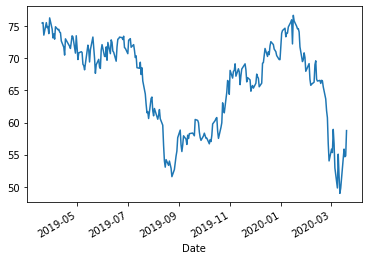

In [4]:
%matplotlib inline
data.Close.plot()

In [5]:
def BBANDS(df,n):
    MA= pd.Series(pd.Series.rolling(df['Close'], n).mean())
    MSD=pd.Series(pd.Series.rolling(df['Close'], n).std())
    b1=MA + (MSD*2)
    B1= pd.Series(b1, name = 'BollingerB_' + str(n))
    df= df.join(B1)
    b2= MA - (MSD*2)
    B2= pd.Series(b2, name = 'Bollinger%b_' + str(n))
    df = df.join(B2)
    return df

In [6]:
df = BBANDS(data,20)

In [7]:
df2 = df[['Close','BollingerB_20','Bollinger%b_20']]

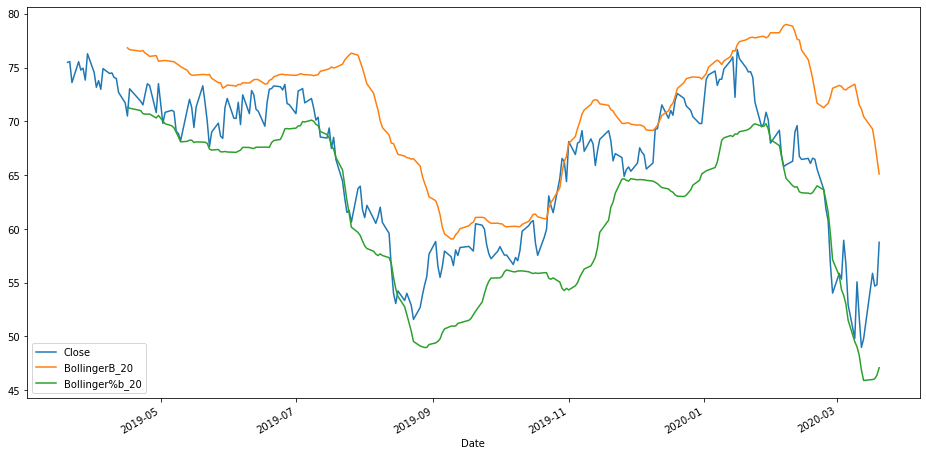

In [8]:
df2.plot(figsize = (16,8))

In [9]:
a = df['BollingerB_20']
b = df['Bollinger%b_20']

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Comportamiento'] = 'Entre bandas'
data.loc[data['Close'] <b, 'Comportamiento'] = 'Cruce de banda superior'
data.loc[data['Close'] >a, 'Comportamiento'] = 'Cruce de banda inferior'

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Recomendacion'] = '-'
data.loc[data['Close'] <b, 'Recomendacion'] = 'Se recomienda vender la accion.'
data.loc[data['Close'] >a, 'Recomendacion'] = 'Se recomienda comprar la accion'

data["Recomendacion"] = data["Recomendacion"].fillna("-")
data["Comportamiento"] = data["Comportamiento"].fillna("Sin informacion")
        

In [10]:
pd.set_option('display.max_rows', None)

In [11]:
data[['Close','Comportamiento', 'Recomendacion']]

,Close,Comportamiento,Recomendacion
Date,,,
2019-03-20,75.489998,Sin informacion,-
2019-03-21,75.559998,Sin informacion,-
2019-03-22,73.610001,Sin informacion,-
2019-03-25,75.550003,Sin informacion,-
2019-03-26,74.769997,Sin informacion,-
2019-03-27,74.949997,Sin informacion,-
2019-03-28,73.839996,Sin informacion,-
2019-03-29,76.290001,Sin informacion,-
2019-04-01,74.559998,Sin informacion,-
